In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('DEOK_hourly.csv')
data['Datetime']=pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

In [4]:
data.head()

,DEOK_MW
Datetime,
2012-12-31 01:00:00,2945.0
2012-12-31 02:00:00,2868.0
2012-12-31 03:00:00,2812.0
2012-12-31 04:00:00,2812.0
2012-12-31 05:00:00,2860.0


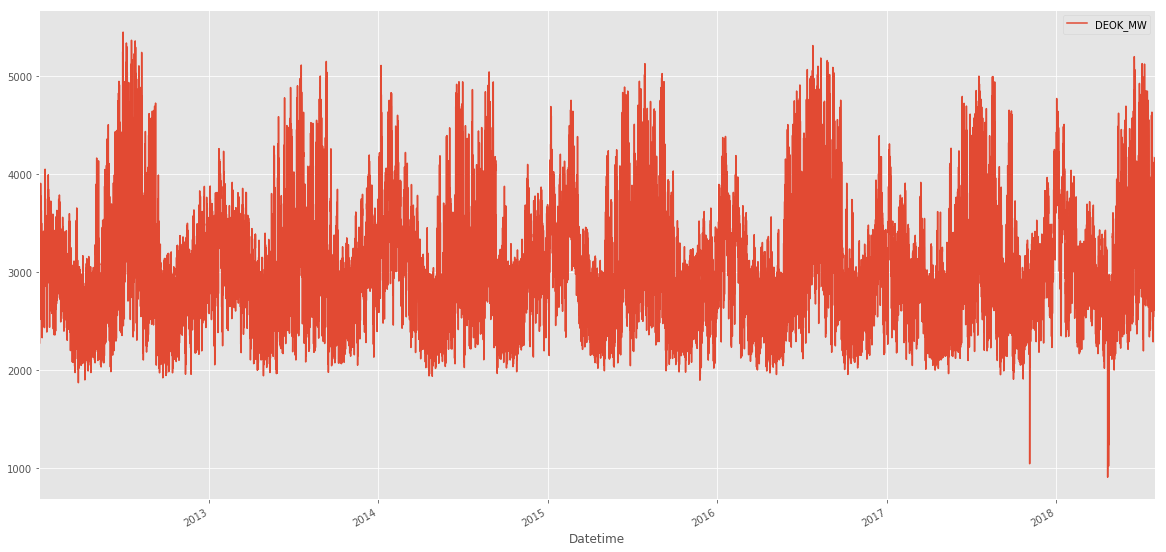

In [5]:
data.plot()

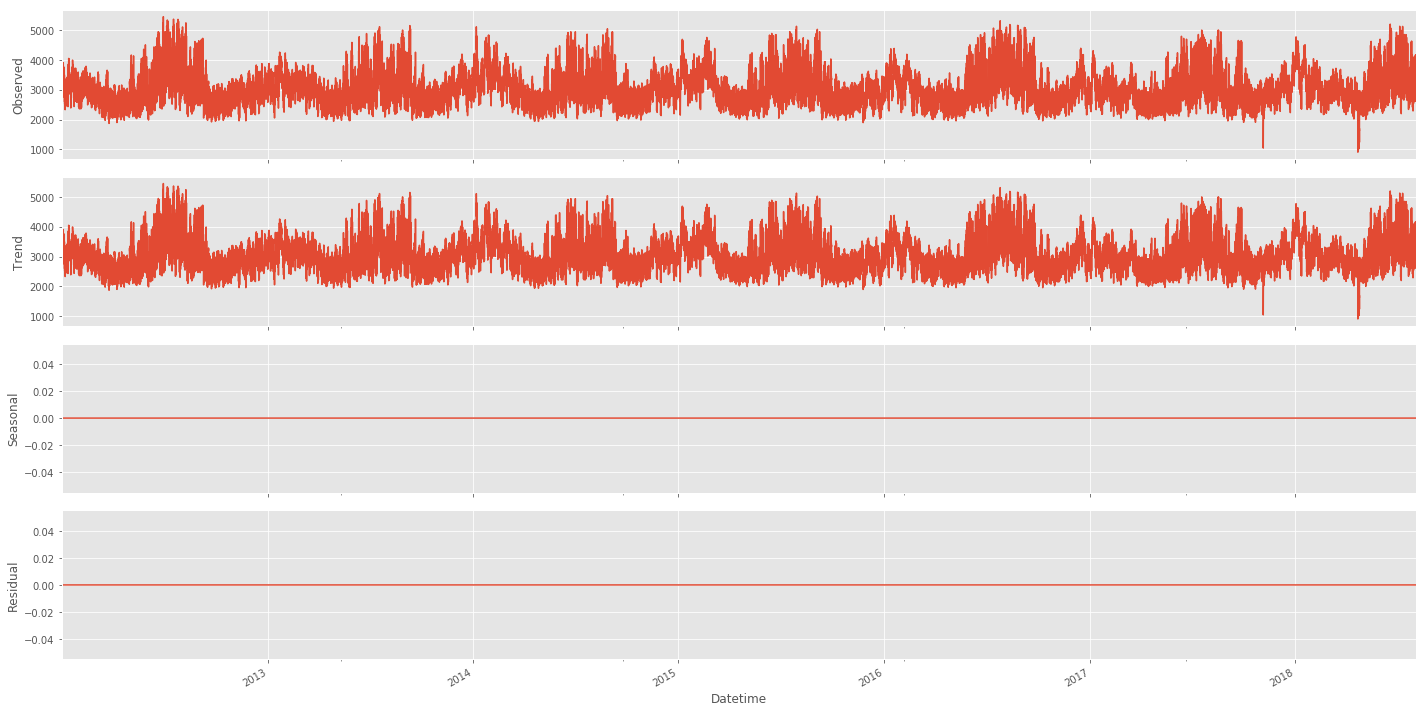

In [7]:
decomposed = seasonal_decompose(data['DEOK_MW'], model='additive', freq=1)
x =decomposed.plot() #See note below about this

In [14]:
data['stationary']=data['AEP_MW'].diff()


In [15]:
data.head()

,AEP_MW,stationary
Datetime,,
2004-12-31 01:00:00,13478.0,NaN
2004-12-31 02:00:00,12865.0,-613.0
2004-12-31 03:00:00,12577.0,-288.0
2004-12-31 04:00:00,12517.0,-60.0
2004-12-31 05:00:00,12670.0,153.0


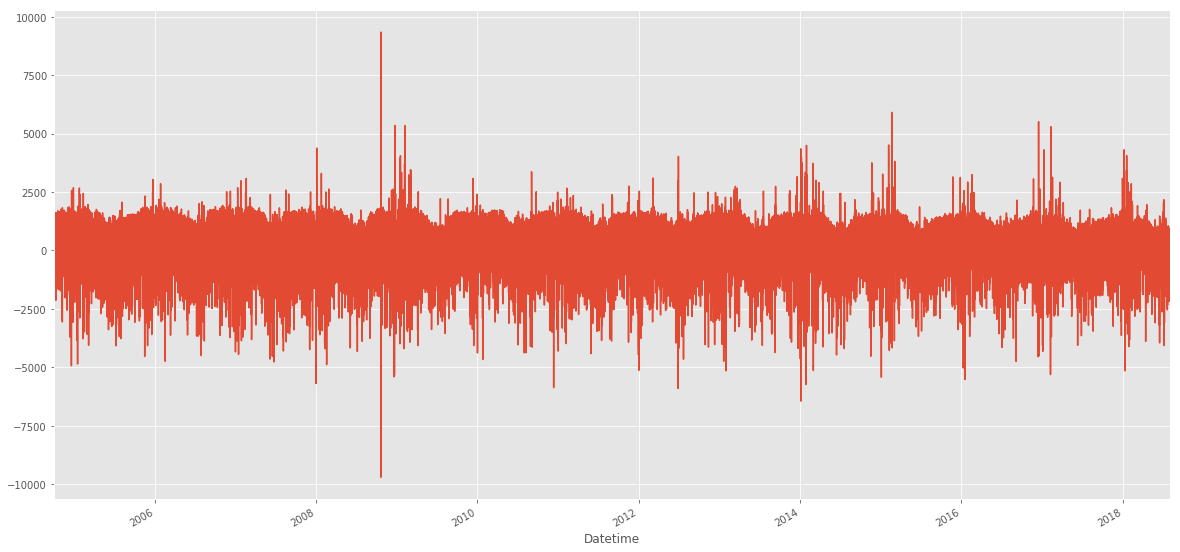

In [16]:
data['stationary'].plot()

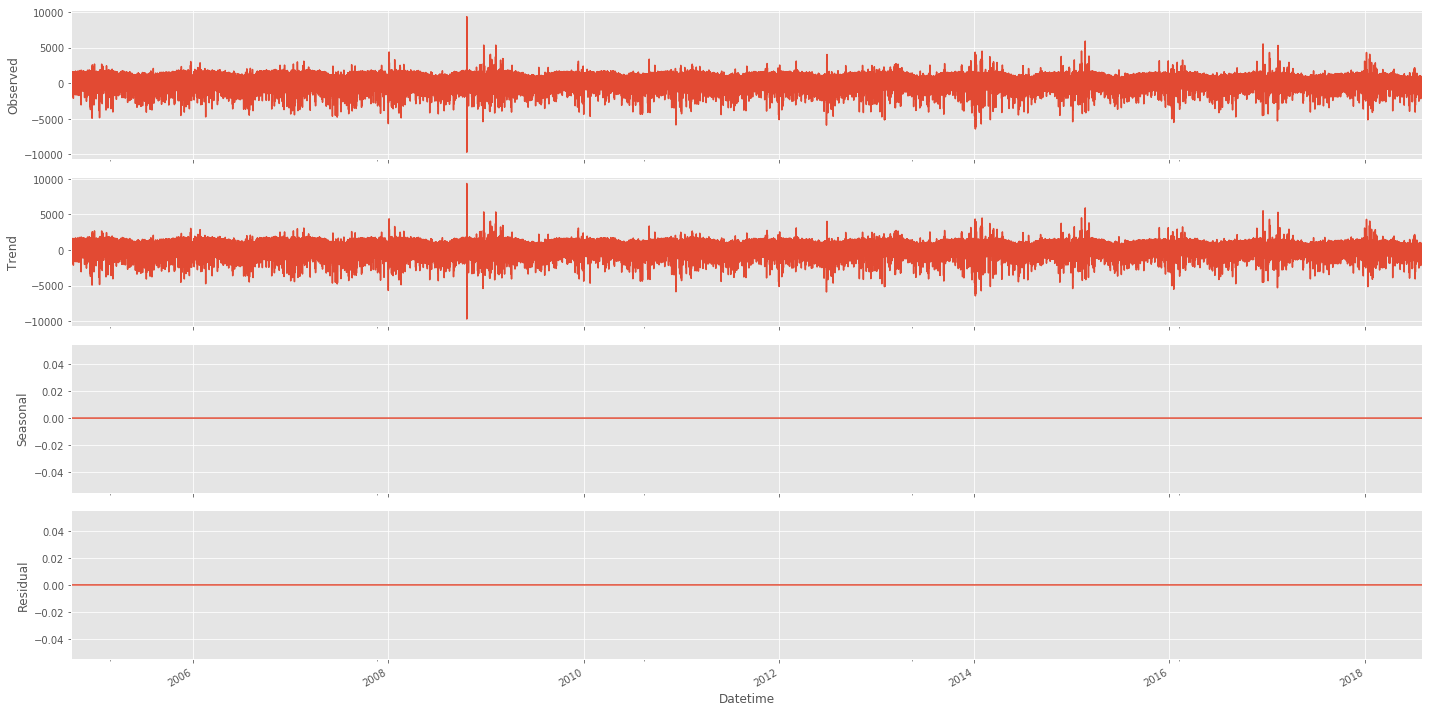

In [17]:
decomposed = seasonal_decompose(data['stationary'].dropna(), model='additive', freq=1)
x =decomposed.plot() #See note below about this

/vagrant/pythondata/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


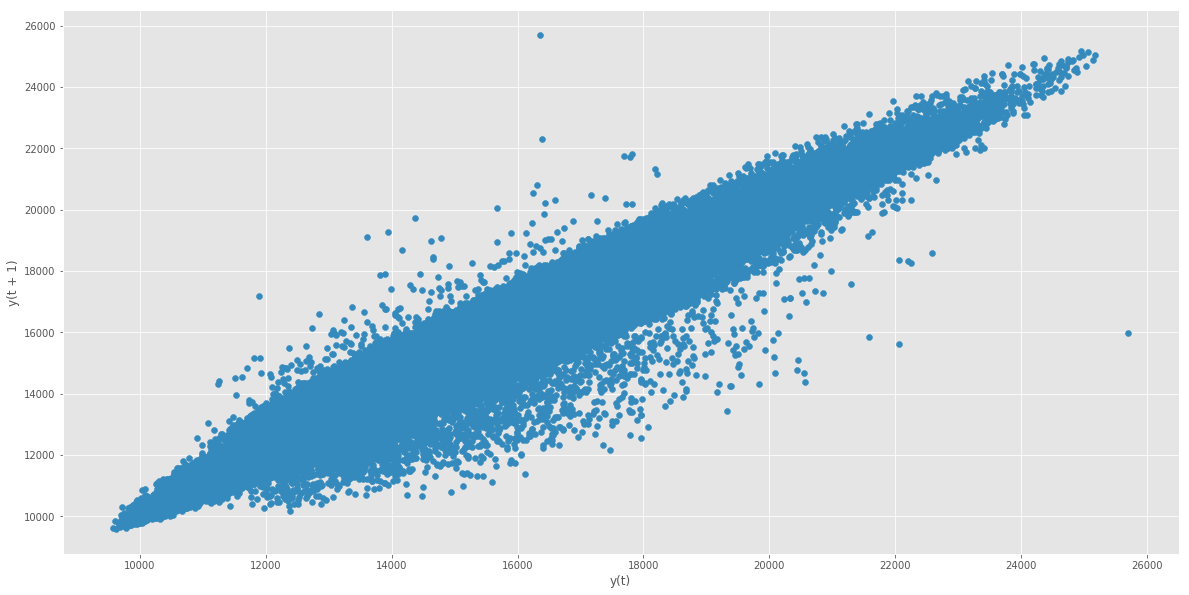

In [18]:
pd.tools.plotting.lag_plot(data['AEP_MW'])

/vagrant/pythondata/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


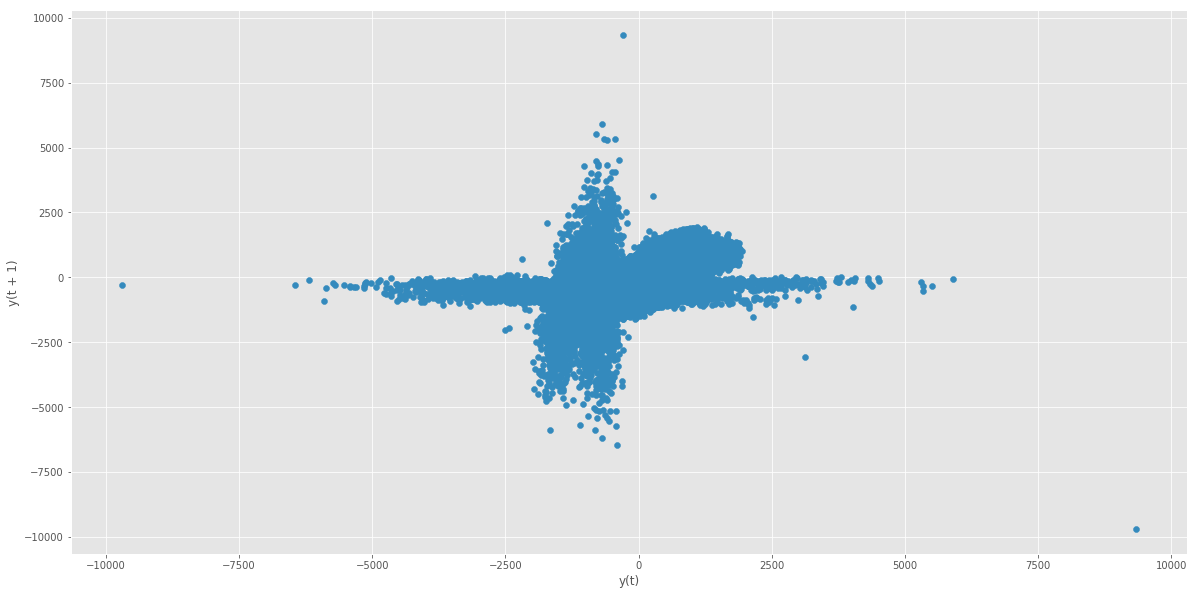

In [19]:
pd.tools.plotting.lag_plot(data['stationary'])